# Proyek Analisis Data: [*Bike Sharing Dataset*]
- **Nama:** Aidul Fitri Mustamin
- **Email:** aidulfitrim@gmail.com
- **ID Dicoding:** aidulfitrimustamin

## Menentukan Pertanyaan Bisnis

- Bagaimanakah tren dari peminjaman sepeda dari waktu ke waktu?
- Apakah terdapat perbedaan peminjaman sepeda antara hari libur dan hari kerja?
- Apakah terdapat korelasi antara variabel seperti temperatur, kelembaban, kecepatan angin, dengan jumlah total peminjaman sepeda?
- Apakah kondisi cuaca memengaruhi jumlah peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
import calendar

## Data Wrangling

### **Gathering Data**

In [ ]:
#Menginput bike sharing dataset
df=pd.read_csv("https://raw.githubusercontent.com/aidulfitri/submission/main/dataset/hour.csv")
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### **Assessing Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Mengecek Missing Values**

In [ ]:
df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Tidak ada missing value di dataset


**Mengecek Duplicated Values**

In [ ]:
df.duplicated().sum()

0

Tidak ada *duplicated values* di dataset

**Mengecek Kesimpulan Statistik dari Data**


In [ ]:
df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [ ]:
print(df.shape)

(17379, 17)


Output ini menjelaskan jika dataset memiliki 17379 baris dan 17 kolom. Berdasarkan hasil output, akan dilakukan pembersihan data.

### **Cleaning Data**

Tahap ini adalah tahap membersihkan data, selain itu beberapa variabel seperti temp, atemp, hum, dan windspeed akan dirubah menjadi nilai sebelum dinormalisasikan agar data lebih dapat dipahami.

In [ ]:
df['dteday']=pd.to_datetime(df['dteday'])

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
df['weekday']=df['dteday'].dt.day_name()
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [ ]:
df['mnth']=df['dteday'].dt.month_name()
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [ ]:
def find_season(season):
  season_string={1:'Winter',2:'Spring',3:'Summer',4:'Fall'}
  return season_string.get(season)
season_list=[]
for season in df['season']:
  season=find_season(season)
  season_list.append(season)
df['season']=season_list
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,0,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,0,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [ ]:
df['yr']=df['dteday'].dt.year
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [ ]:
df['temp']=df['temp']*41
df['atemp']=df['atemp']*50
df['hum']=df['hum']*100
df['windspeed']=df['windspeed']*67
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,2011,January,0,0,Saturday,0,1,9.84,14.395,81.0,0.0,3,13,16
1,2,2011-01-01,Winter,2011,January,1,0,Saturday,0,1,9.02,13.635,80.0,0.0,8,32,40
2,3,2011-01-01,Winter,2011,January,2,0,Saturday,0,1,9.02,13.635,80.0,0.0,5,27,32
3,4,2011-01-01,Winter,2011,January,3,0,Saturday,0,1,9.84,14.395,75.0,0.0,3,10,13
4,5,2011-01-01,Winter,2011,January,4,0,Saturday,0,1,9.84,14.395,75.0,0.0,0,1,1


## Exploratory Data Analysis (EDA)

In [ ]:
df.dtypes #mengetahui jenis data untuk tiap variabel

instant                int64
dteday        datetime64[ns]
season                object
yr                     int64
mnth                  object
hr                     int64
holiday                int64
weekday               object
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [ ]:
float_vars = ['temp','atemp','hum','windspeed']
df_float = df[float_vars]

df_float.describe()

,temp,atemp,hum,windspeed
count,17379.000000,17379.000000,17379.000000,17379.000000
mean,20.376474,23.788755,62.722884,12.736540
std,7.894801,8.592511,19.292983,8.196795
min,0.820000,0.000000,0.000000,0.000000
25%,13.940000,16.665000,48.000000,7.001500
50%,20.500000,24.240000,63.000000,12.998000
75%,27.060000,31.060000,78.000000,16.997900
max,41.000000,50.000000,100.000000,56.996900


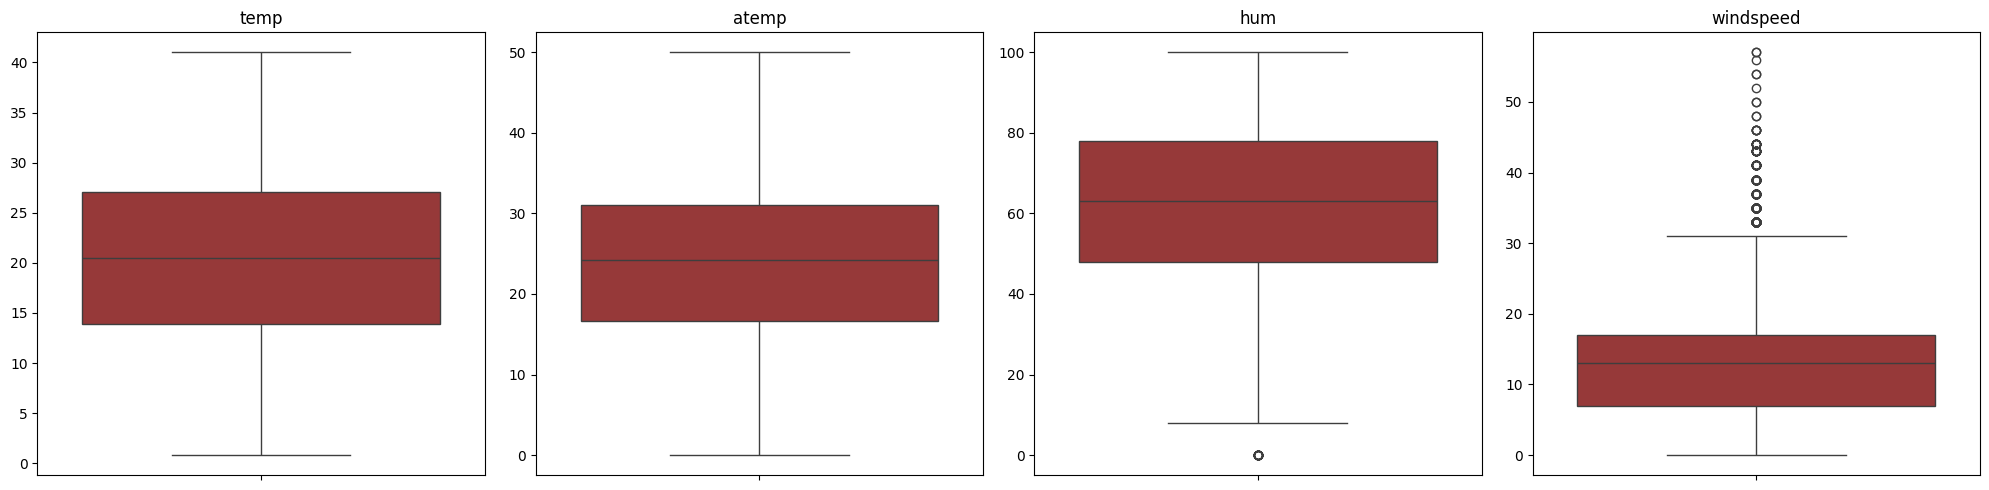

In [ ]:
#Membuat visualisasi data Boxplot untuk tiap variabel
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

for i, ax in enumerate(axs):
    sns.boxplot(y=df_float[float_vars[i]], orient='v', ax=ax, color='brown')

    ax.set_title(float_vars[i])
    ax.set_ylabel("")

plt.tight_layout()

plt.show()

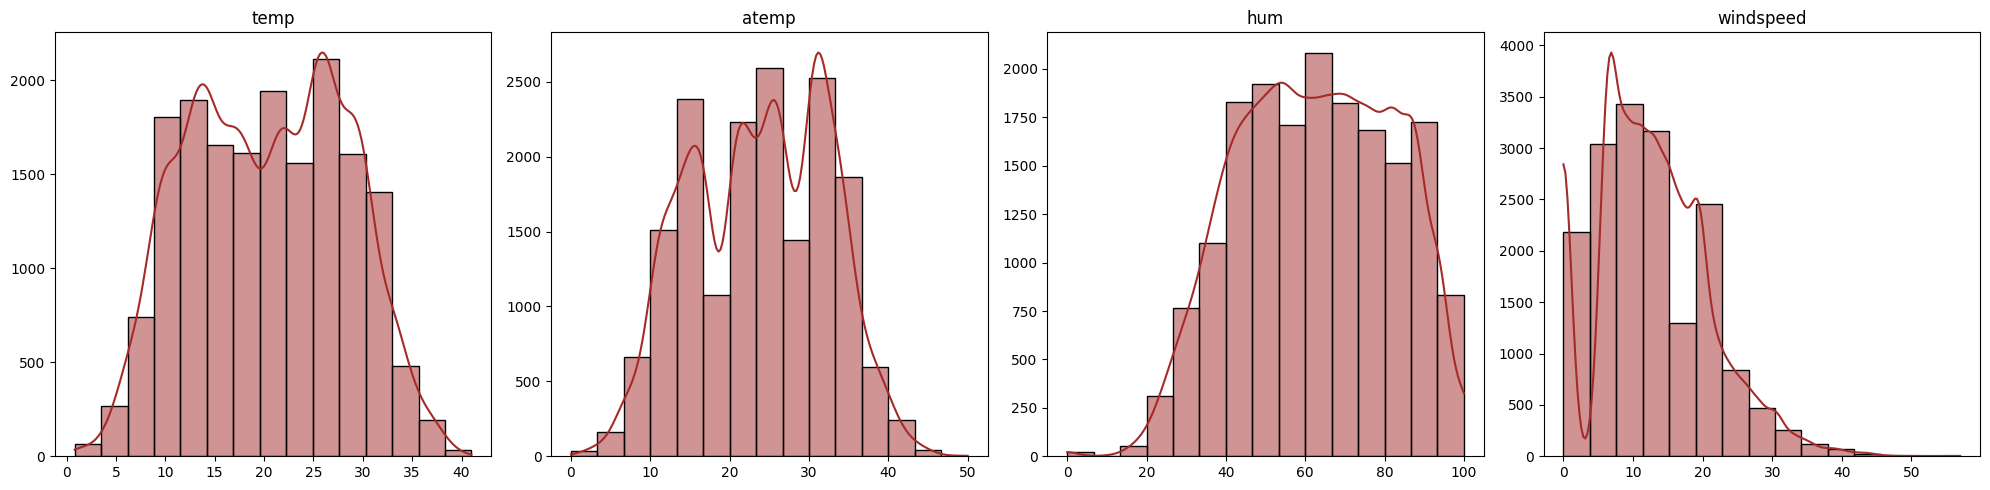

In [ ]:
#Membuat visualisasi data histogram untuk tiap variabel
fig, axs = plt.subplots(1, 4, figsize=(20,5))

for i, ax in enumerate(axs):
    sns.histplot(x=df_float[float_vars[i]], ax=ax, kde=True, bins=15, color='brown')

    ax.set_title(float_vars[i])
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.tight_layout()

plt.show()

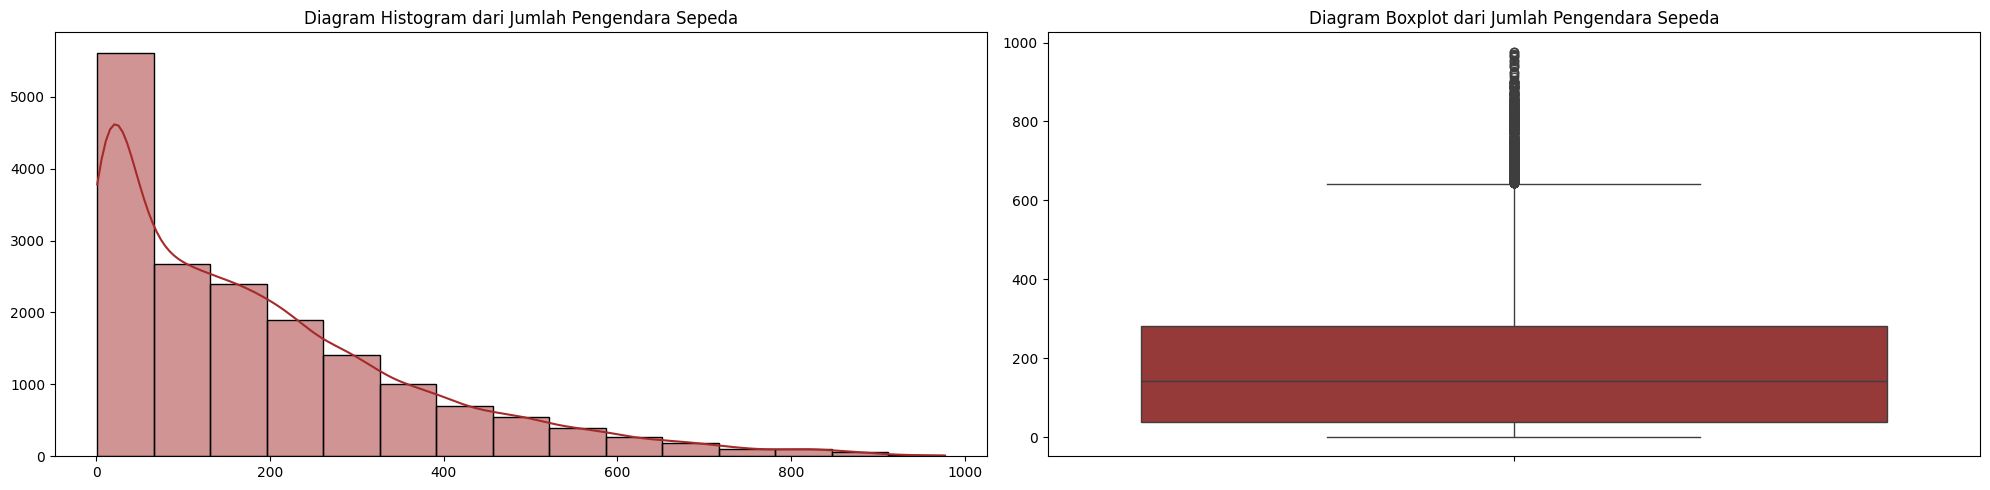

In [115]:
#Diagram Histogram dan Diagram Boxplot Jumlah Pengendara Sepeda Pinjam
fig, axs = plt.subplots(1,2, figsize=(20, 5))


sns.histplot(df['cnt'], kde=True, bins=15, ax = axs[0], color='brown')
axs[0].set_title("Diagram Histogram dari Jumlah Pengendara Sepeda")
axs[0].set_xlabel("")
axs[0].set_ylabel("")
sns.boxplot(y=df['cnt'], ax = axs[1], color='brown')
axs[1].set_title("Diagram Boxplot dari Jumlah Pengendara Sepeda")
axs[1].set_xlabel("")
axs[1].set_ylabel("")

plt.tight_layout()

plt.show()

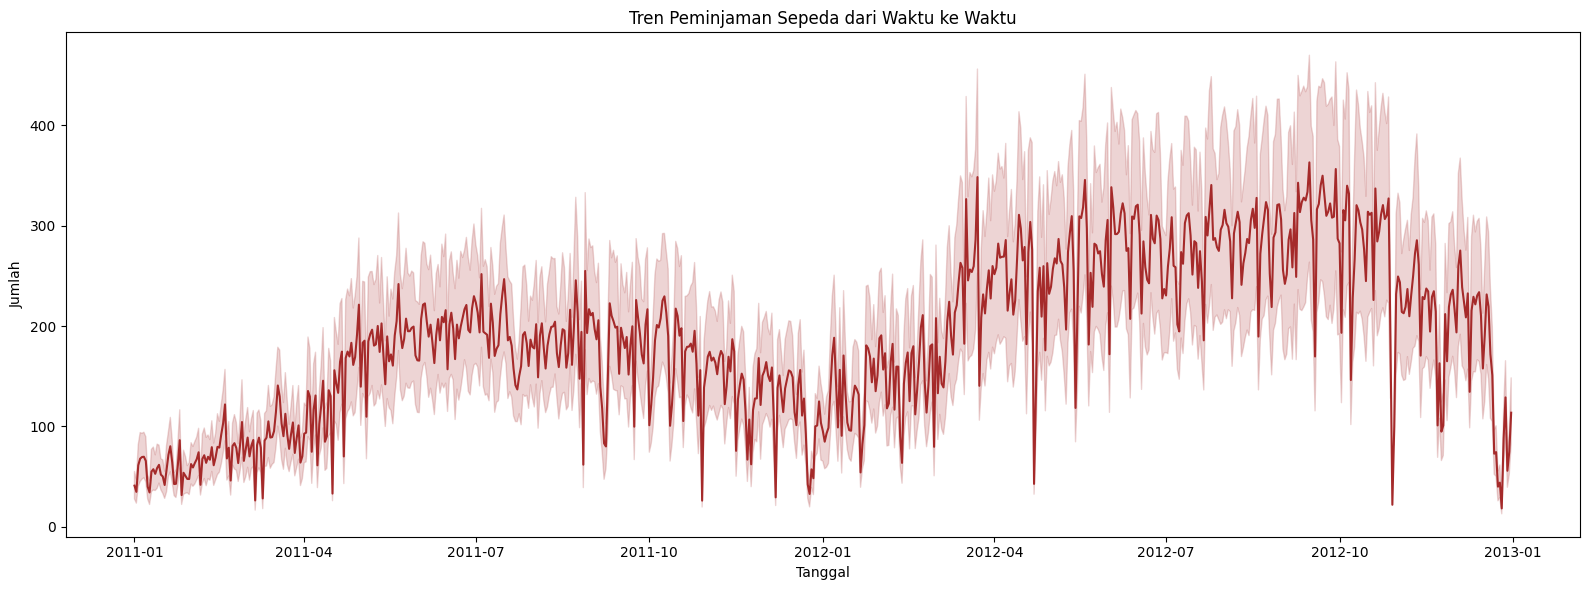

In [ ]:
#Tren Peminjaman Sepeda
plt.figure(figsize=(16,6))

sns.lineplot(x="dteday", y="cnt", data=df, color='brown')

plt.xlabel("Tanggal")
plt.ylabel("Jumlah")
plt.title("Tren Peminjaman Sepeda dari Waktu ke Waktu")

plt.tight_layout()
plt.show()

<ipython-input-67-dd8cc8abaada>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


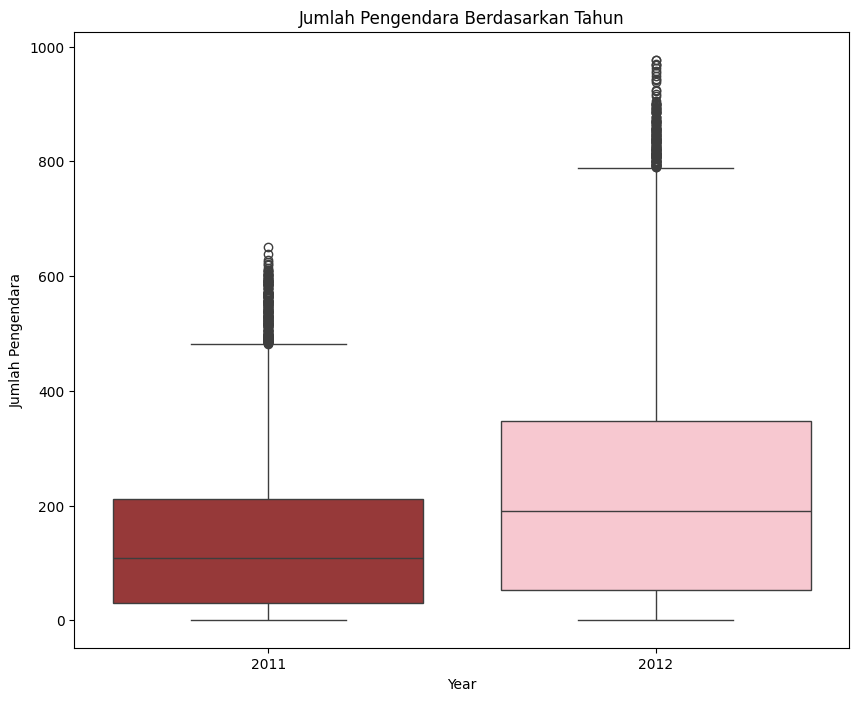

In [ ]:
#Jumlah Pengendara Berdasarkan Tahun
plt.figure(figsize=(10,8))

sns.boxplot(
    x="yr",
    y="cnt",
    data=df,
    palette=["brown", "pink"]
)

plt.xlabel("Year")
plt.ylabel("Jumlah Pengendara")
plt.title("Jumlah Pengendara Berdasarkan Tahun")

plt.show()

<ipython-input-57-f1677b0c1bd4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Hari Libur", "Hari Kerja"], y=[holiday_sum, workingday_sum], palette=["yellow", "brown"],legend=False)


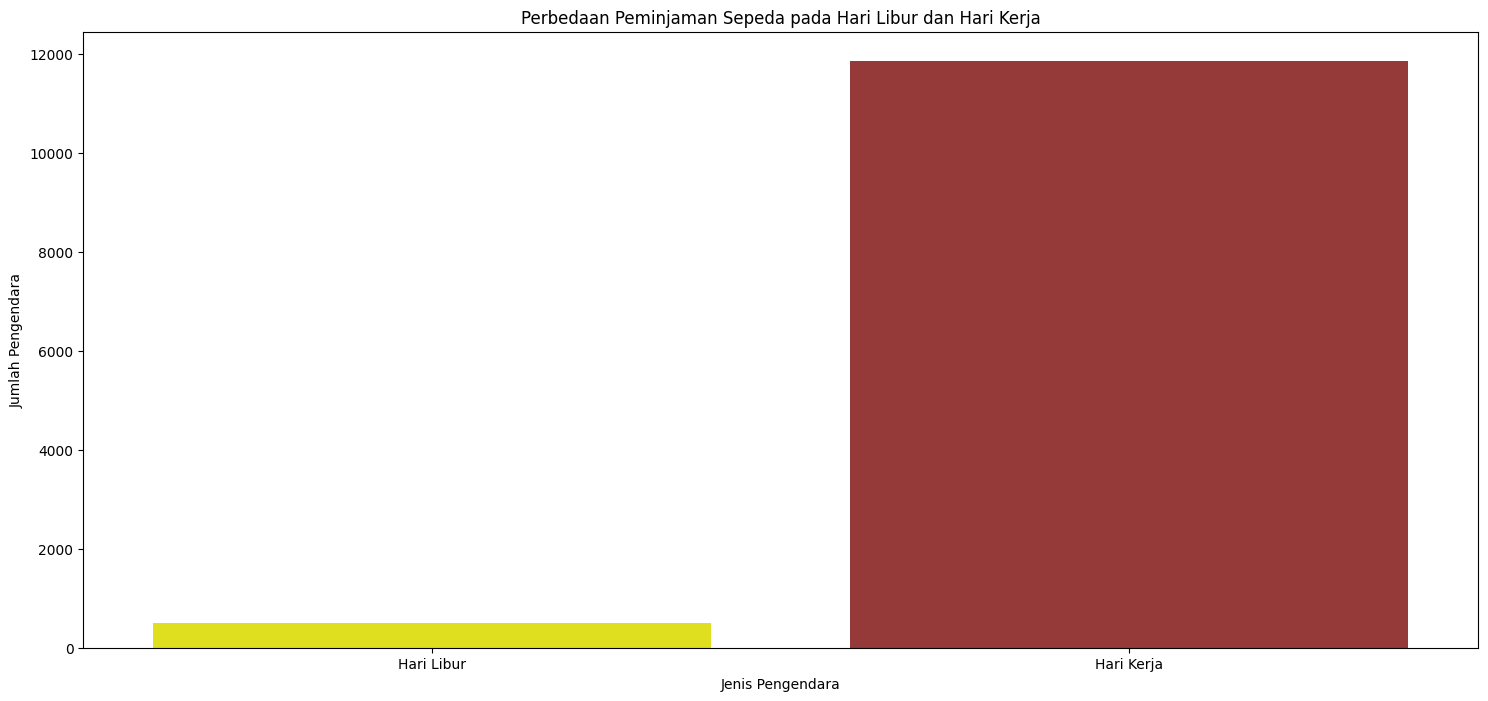

Jumlah pengendara di hari libur: 500
Jumlah pengendara di hari kerja: 11865


In [ ]:
#Perbedaan Peminjaman Sepeda pada Hari Libur dan Hari Kerja
holiday_sum = df['holiday'].sum()
workingday_sum = df['workingday'].sum()

plt.figure(figsize=(18,8))

sns.barplot(x=["Hari Libur", "Hari Kerja"], y=[holiday_sum, workingday_sum], palette=["yellow", "brown"],legend=False)

plt.xlabel("Jenis Pengendara")
plt.ylabel("Jumlah Pengendara")
plt.title("Perbedaan Peminjaman Sepeda pada Hari Libur dan Hari Kerja")

plt.show()

print(f"Jumlah pengendara di hari libur: {holiday_sum}")
print(f"Jumlah pengendara di hari kerja: {workingday_sum}")

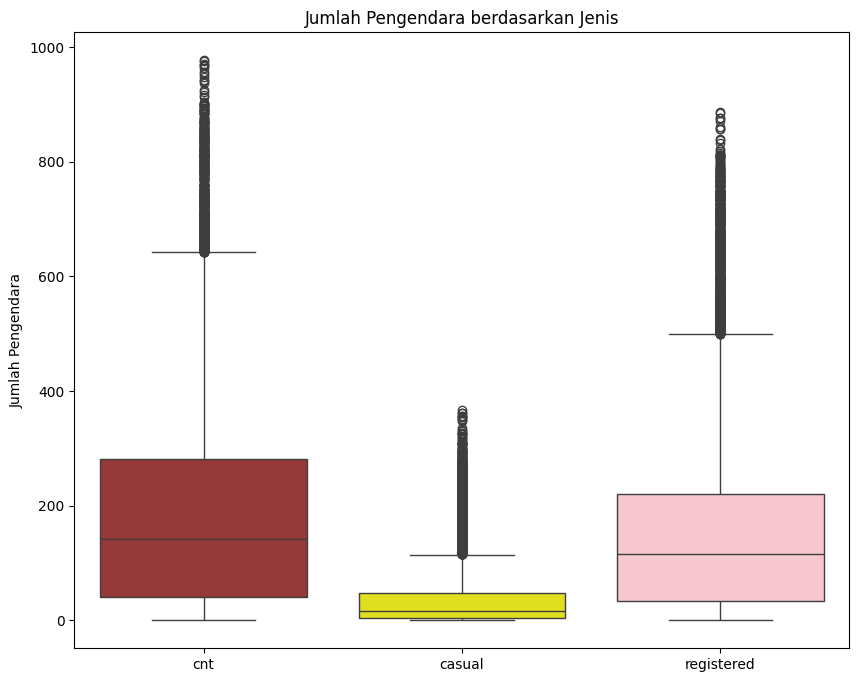

In [ ]:
#Jumlah Pengendara berdasarkan Jenis
plt.figure(figsize=(10,8))

data = df[['cnt', 'casual', 'registered']]
colors = ['brown', 'yellow', 'pink']

sns.boxplot(data=data, palette=colors)

plt.ylabel("Jumlah Pengendara")
plt.title("Jumlah Pengendara berdasarkan Jenis")

plt.show()

In [ ]:
#Mengetahui nilai Scatter
scatter_vars = ['cnt', 'temp', 'atemp', 'hum', 'windspeed']
df_scatter = df[scatter_vars]

df_scatter.head(3)

,cnt,temp,atemp,hum,windspeed
0,16,9.84,14.395,81.0,0.0
1,40,9.02,13.635,80.0,0.0
2,32,9.02,13.635,80.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [ ]:
df.corr(numeric_only=True)

,instant,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.866014,-0.004775,0.014723,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
yr,0.866014,1.000000,-0.003867,0.006692,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
hr,-0.004775,-0.003867,1.000000,0.000479,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,0.006692,0.000479,1.000000,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
workingday,-0.003416,-0.002196,0.002285,-0.252471,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.019157,-0.020203,-0.017036,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.040913,0.137603,-0.027340,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.137615,0.039222,0.133750,-0.030973,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929
hum,0.009577,-0.083546,-0.276498,-0.010588,0.015688,0.418130,-0.069881,-0.051918,1.000000,-0.290105,-0.347028,-0.273933,-0.322911
windspeed,-0.074505,-0.008740,0.137252,0.003988,-0.011830,0.026226,-0.023125,-0.062336,-0.290105,1.000000,0.090287,0.082321,0.093234


<ipython-input-78-7f729eb10db7>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


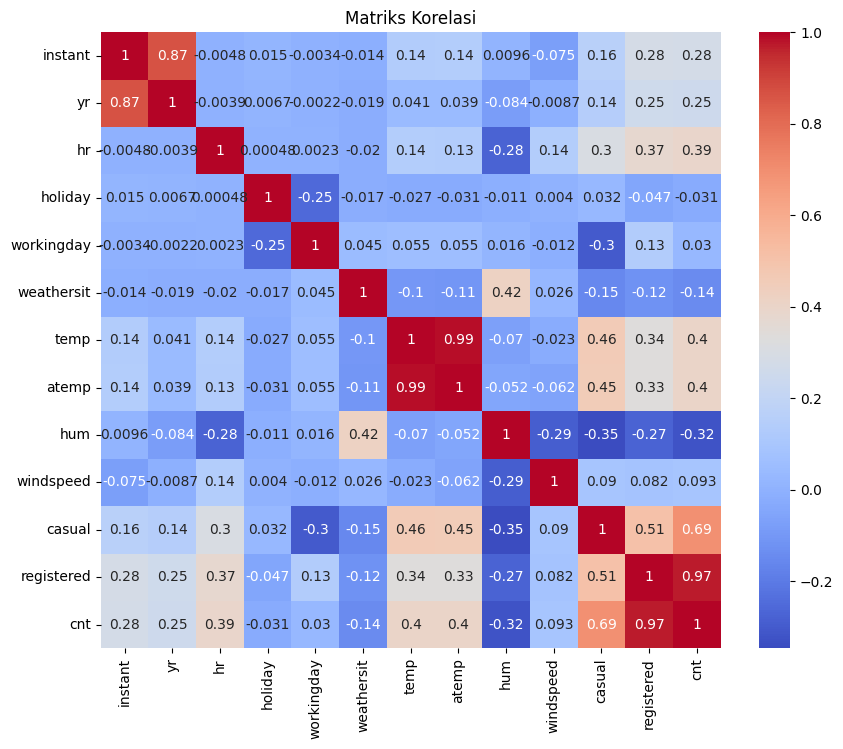

In [ ]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

## Visualization & Explanatory Analysis

### **Pertanyaan 1:**

Bagaimanakah tren dari peminjaman sepeda dari waktu ke waktu?

In [103]:
pengguna_bulanan_df = df.resample(rule='M', on='dteday').agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

pengguna_bulanan_df.index = pengguna_bulanan_df.index.strftime('%b-%y')

pengguna_bulanan_df

,casual,registered,cnt
dteday,,,
Jan-11,3073,35116,38189
Feb-11,6242,41973,48215
Mar-11,12826,51219,64045
Apr-11,22346,72524,94870
May-11,31050,104771,135821
Jun-11,30612,112900,143512
Jul-11,36452,104889,141341
Aug-11,28842,107849,136691
Sep-11,26545,100873,127418


In [104]:
pengguna_bulanan_df=pengguna_bulanan_df.reset_index()
pengguna_bulanan_df=pengguna_bulanan_df.rename(columns={'dteday':'yearmonth'})
pengguna_bulanan_df

,yearmonth,casual,registered,cnt
0,Jan-11,3073,35116,38189
1,Feb-11,6242,41973,48215
2,Mar-11,12826,51219,64045
3,Apr-11,22346,72524,94870
4,May-11,31050,104771,135821
5,Jun-11,30612,112900,143512
6,Jul-11,36452,104889,141341
7,Aug-11,28842,107849,136691
8,Sep-11,26545,100873,127418
9,Oct-11,25222,98289,123511


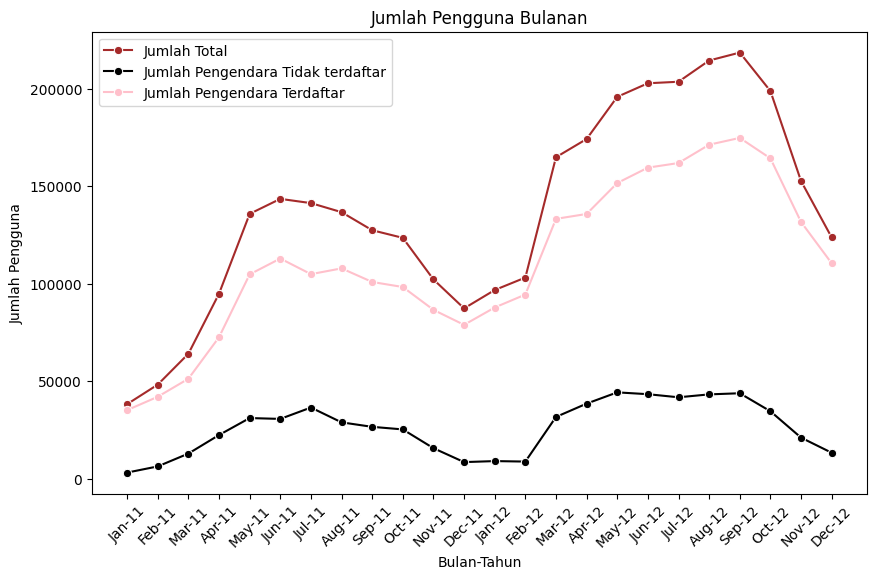

In [105]:
# Reset index dan ubah nama kolom
pengguna_bulanan_df = pengguna_bulanan_df.reset_index()
pengguna_bulanan_df = pengguna_bulanan_df.rename(columns={'dteday': 'yearmonth'})

# Membuat diagram garis
plt.figure(figsize=(10, 6))
sns.lineplot(data=pengguna_bulanan_df, x='yearmonth', y='cnt', color='brown', marker='o', label='Jumlah Total')
sns.lineplot(data=pengguna_bulanan_df, x='yearmonth', y='casual', color='black', marker='o', label='Jumlah Pengendara Tidak terdaftar')
sns.lineplot(data=pengguna_bulanan_df, x='yearmonth', y='registered', color='pink', marker='o', label='Jumlah Pengendara Terdaftar')

plt.xlabel('Bulan-Tahun')
plt.ylabel('Jumlah Pengguna')
plt.title('Jumlah Pengguna Bulanan')
plt.xticks(rotation=45)
plt.legend()
plt.show()

Hasil dari plot ini menjelaskan bahwa pengendara sepeda pinjam mengalami peningkatan pesat di tahun 2012. Pada awal tahun 2011, pengendara sepeda pinjam masih sangat kurang, namun kemudian perlahan mengalami kenaikan hingga pada pertengahan tahun 2011. Namun, pada Bulan Juni 2011 jumlah pengguna sepeda pinjam kembali menurun hingga akhir tahun.

### **Pertanyaan 2:**

Apakah terdapat perbedaan peminjaman sepeda antara hari libur dan hari kerja?

<ipython-input-106-c7a0f0ff0958>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Hari Libur", "Hari Kerja"], y=[holiday_sum, workingday_sum], palette=["yellow", "brown"],legend=False)


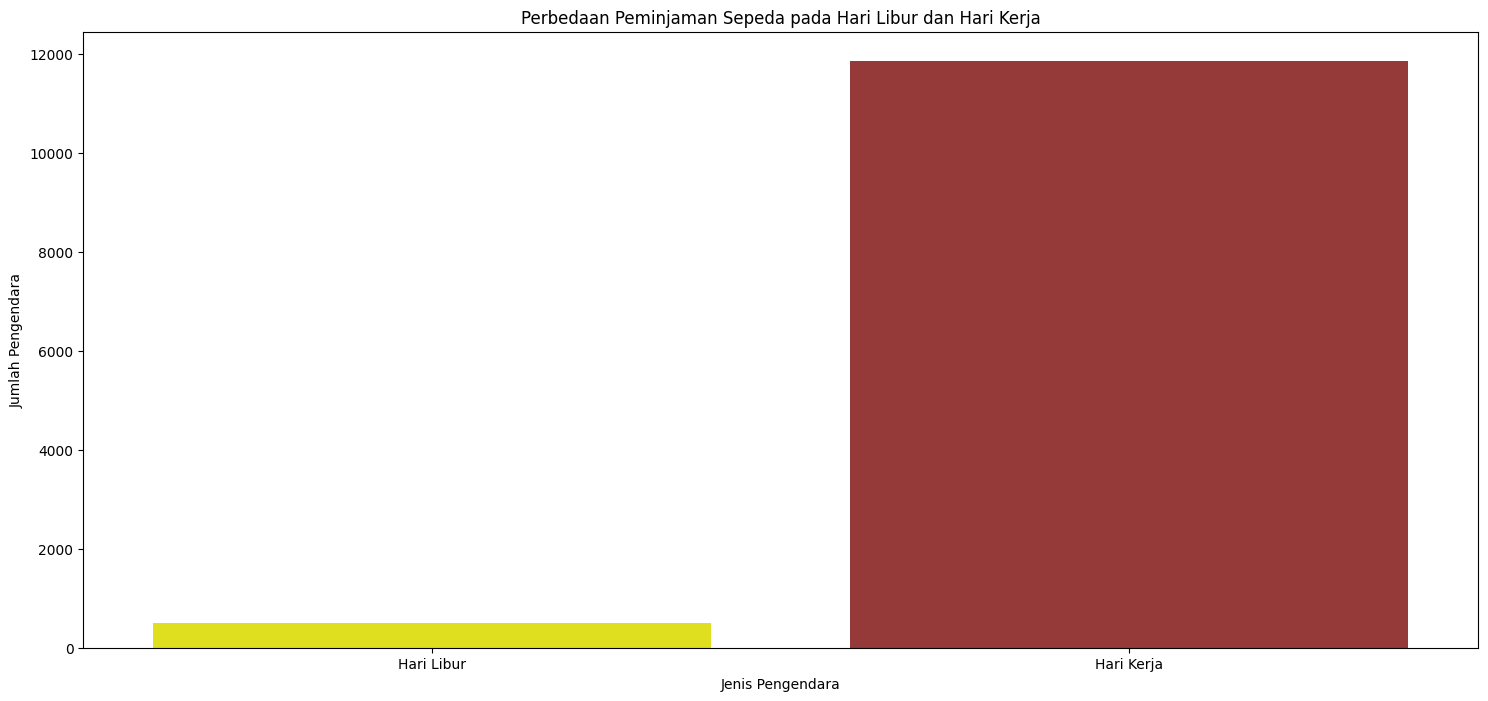

Jumlah pengendara di hari libur: 500
Jumlah pengendara di hari kerja: 11865


In [106]:
holiday_sum = df['holiday'].sum()
workingday_sum = df['workingday'].sum()

plt.figure(figsize=(18,8))

sns.barplot(x=["Hari Libur", "Hari Kerja"], y=[holiday_sum, workingday_sum], palette=["yellow", "brown"],legend=False)

plt.xlabel("Jenis Pengendara")
plt.ylabel("Jumlah Pengendara")
plt.title("Perbedaan Peminjaman Sepeda pada Hari Libur dan Hari Kerja")

plt.show()

print(f"Jumlah pengendara di hari libur: {holiday_sum}")
print(f"Jumlah pengendara di hari kerja: {workingday_sum}")

Dari hasil ini diketahui bahwa pengendara sepeda pinjam di hari kerja lebih banyak dibandingkan di hari libur. Perbandingan dari pengendara di hari libur dan hari kerja mencapai perbandingan 1:24, sehingga dapat disimpulkan jika terdapat perbedaan antara jumlah pengendara di hari kerja dengan jumlah pengendara di hari libur.

### **Pertanyaan 3**

Apakah terdapat korelasi antara variabel seperti temperatur, kelembaban, kecepatan angin, dengan jumlah total peminjaman sepeda?

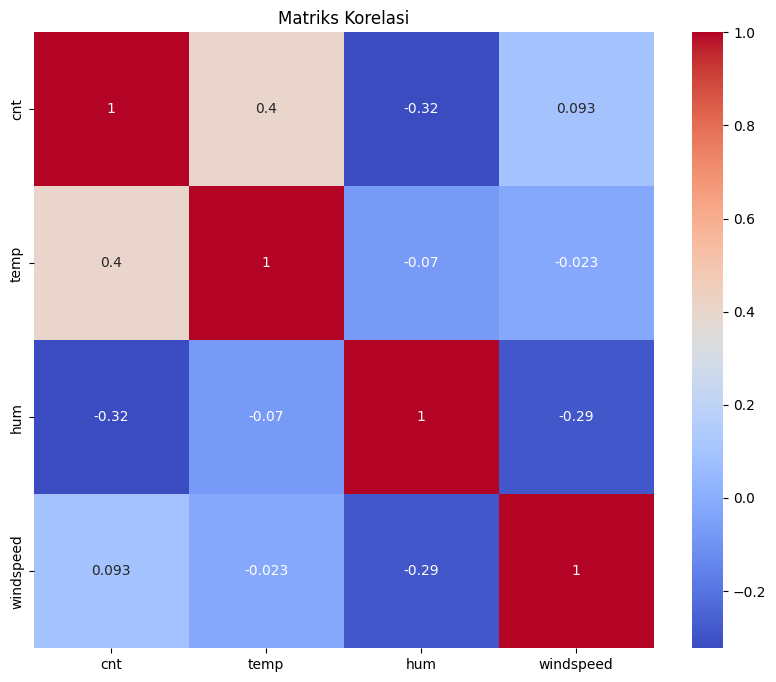

In [108]:
# Memilih kolom-kolom yang relevan
scatter_vars = ['cnt', 'temp', 'hum', 'windspeed']
df_scatter = df[scatter_vars]

# Menghitung matriks korelasi
corr_matrix = df_scatter.corr()

# Membuat heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

Berdasarkan matriks korelasi di atas, maka dapat disimpulkan:

**1. Kecepatan angin (*windspeed*):**
Berdasarkan matriks korelasi, ditemukan bahwa kecepatan angin memiliki hubungan positif yang lemah dengan kelembaban (*hum*), yang berarti saat kecepatan angin meningkat, kelembaban cenderung meningkat sedikit. Kecepatan angin juga memiliki hubungan negatif yang lemah dengan temperatur (*temp*), yang berarti saat kecepatan angin meningkat, temperatur cenderung sedikit menurun. Selain itu, terdapat hubungan negatif yang lemah antara kecepatan angin dan jumlah total peminjaman sepeda (*cnt*), yang berarti saat kecepatan angin meningkat, jumlah total peminjaman sepeda cenderung sedikit menurun.



**2. Kelembaban (*hum*):**

Kelembaban (*hum*) memiliki hubungan positif yang lemah dengan temperatur (temp). Artinya, saat kelembaban meningkat, temperatur cenderung meningkat sedikit. Selain itu, kelembaban (*hum*) memiliki hubungan negatif yang lemah dengan jumlah total peminjaman sepeda (*cnt*). Artinya, saat kelembaban meningkat, jumlah total peminjaman sepeda cenderung menurun sedikit.

**3. Temperatur (*temp*):**
Temperatur memiliki hubungan negatif yang lemah dengan total pengendara sepeda pinjam (*cnt*). Artinya, saat temperatur meningkat, total pengendara sepeda pinjam cenderung menurun.

### **Pertanyaan 4**

Apakah kondisi cuaca memengaruhi jumlah peminjaman sepeda?

In [109]:
weatherly_users_df = df.groupby("weathersit").agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})
weatherly_users_df = weatherly_users_df.reset_index()
weatherly_users_df

,weathersit,casual,registered,cnt
0,1,462745,1875428,2338173
1,2,134481,661471,795952
2,3,22783,135548,158331
3,4,8,215,223


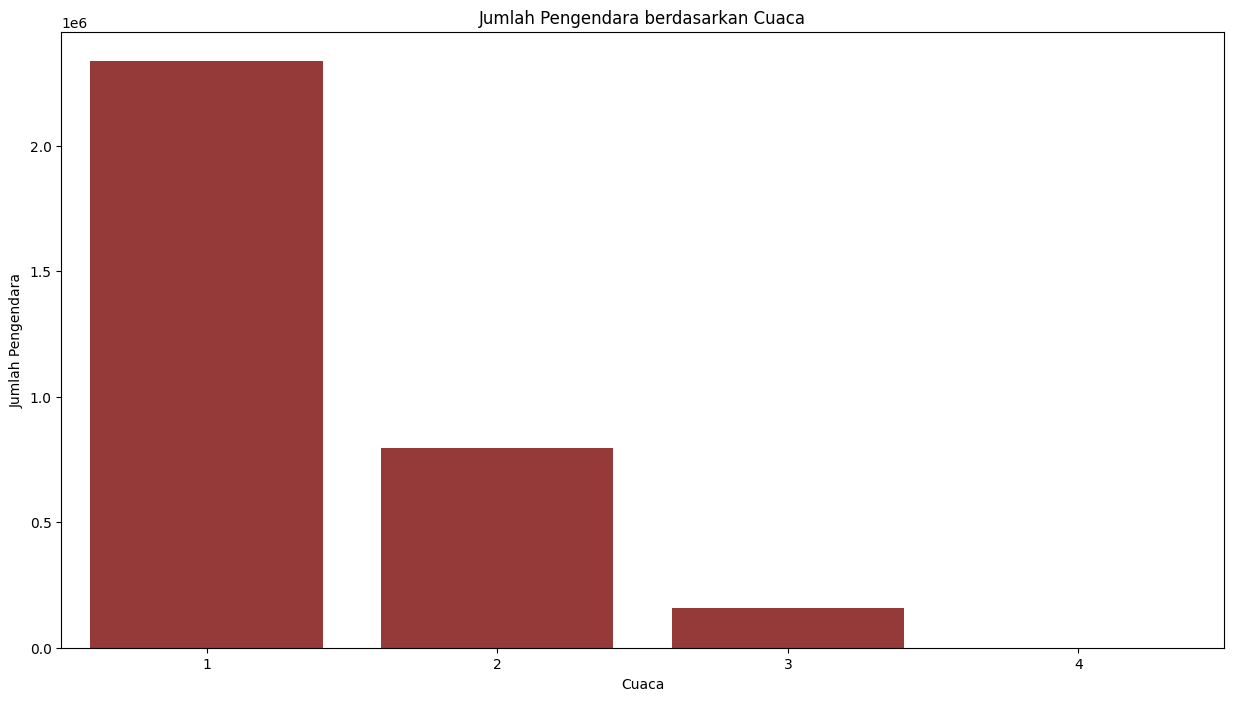

In [111]:
plt.figure(figsize=(15,8))

sns.barplot(x="weathersit", y="cnt", color='brown', data=weatherly_users_df)

plt.xlabel("Cuaca")
plt.ylabel("Jumlah Pengendara")
plt.title("Jumlah Pengendara berdasarkan Cuaca")

plt.show()

Cuaca pada data dikategorikan menjadi 4, dimana kategori cuaca adalah sebagai berikut:
- 1: Cerah, Berawan, Sebagian berawan, berawan
- 2: Kabut + Berawan, Kabut + Awan tersebar, Kabut + Sedikit berawan, Kabut
- 3: Salju Ringan, Hujan Ringan + Badai Petir + Awan tersebar, Hujan Ringan + Awan tersebar
- 4: Hujan Lebat + Butiran Es + Badai Petir + Kabut, Salju + Kabut


Dari hasil kategori ini diketahui bahwa pengguna sepeda pinjam dipengaruhi oleh cuaca. Dimana, jika keadaan cuaca buruk maka pengguna sepeda pinjam akan semakin berkurang. Sebaliknya, jika cuaca baik maka pengguna sepeda pinjam akan meningkat.

## Conclusion

**1.** **Bagaimanakah tren dari peminjaman sepeda dari waktu ke waktu?**

---
Terjadi fluktuasi musiman dengan penurunan di musim hujan (Desember-Januari) dan kenaikan di musim kemarau (Juni-Agustus). Selain itu, pengguna terdaftar (*registered user*) mendominasi total pengguna sejak pertengahan 2012.


**2. Apakah terdapat perbedaan peminjaman sepeda antara hari libur dan hari kerja?**

---
Terdapat perbedaan peminjaman sepeda di hari hari tertentu. Pengendara sepeda pinjam di hari kerja memiliki jumlah yang lebih banyak dibandingkan di hari libur.


**3. Apakah terdapat korelasi antara variabel seperti temperatur, kelembaban, kecepatan angin, dengan jumlah total peminjaman sepeda?**


---

Berdasarkan hasil yang diperoleh dari matriks korelasi, maka diketahui variabel temperatur, kelembaban, dan kecepatan angin memiliki korelasi atau hubungan yang lemah terhadap jumlah pengendara sepeda pinjam.

**4. Apakah kondisi cuaca memengaruhi jumlah peminjaman sepeda?**

---
Kondisi cuaca, terutama suhu dan kecepatan angin, memiliki pengaruh yang signifikan terhadap jumlah peminjaman sepeda.

***Terima Kasih***